Sensor 0 sent data: 80 at time 0
Sensor 1 sent data: 47 at time 0
Sensor 2 sent data: 43 at time 0
Sensor 3 sent data: 93 at time 0
Sensor 4 sent data: 20 at time 0
Aggregator received data: 80 at time 0
Aggregator received data: 47 at time 0
Aggregator received data: 43 at time 0
Aggregator received data: 93 at time 0
Aggregator received data: 20 at time 0
Sensor 4 sent data: 79 at time 1.9917103626424364
Aggregator received data: 79 at time 1.9917103626424364
Sensor 2 sent data: 25 at time 2.578803209291489
Aggregator received data: 25 at time 2.578803209291489
Sensor 1 sent data: 39 at time 3.7803687837631936
Aggregator received data: 39 at time 3.7803687837631936
Sensor 3 sent data: 17 at time 4.281007359845207
Aggregator received data: 17 at time 4.281007359845207
Sensor 0 sent data: 93 at time 4.549183892713094
Aggregator received data: 93 at time 4.549183892713094
Sensor 1 sent data: 2 at time 6.422052402368812
Aggregator received data: 2 at time 6.422052402368812
Sensor 3 sent 

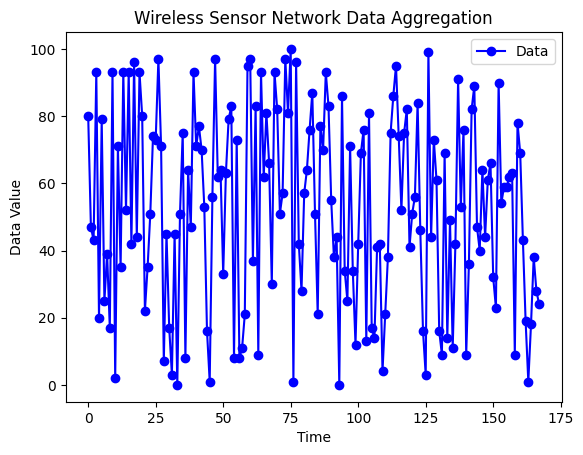

In [4]:
import simpy
import random
import matplotlib.pyplot as plt

# Define parameters
NUM_SENSORS = 5
MAX_DATA = 100
SIMULATION_TIME = 100

# Data aggregator
def data_aggregator(env, data_queue, results):
    while True:
        data = yield data_queue.get()
        results.append(data)
        print(f"Aggregator received data: {data} at time {env.now}")

# Sensor node
def sensor_node(env, node_id, data_queue):
    while True:
        data = random.randint(0, MAX_DATA)
        data_queue.put(data)
        print(f"Sensor {node_id} sent data: {data} at time {env.now}")
        yield env.timeout(random.uniform(1, 5))  # Random data transmission interval

# Initialize simulation environment
env = simpy.Environment()

# Create a data queue and result list
data_queue = simpy.Store(env)
results = []

# Create data aggregator process
env.process(data_aggregator(env, data_queue, results))

# Create sensor nodes
for i in range(NUM_SENSORS):
    env.process(sensor_node(env, i, data_queue))

# Run the simulation
env.run(until=SIMULATION_TIME)

# Visualize the results
plt.plot(results, 'bo-', label='Data')
plt.xlabel('Time')
plt.ylabel('Data Value')
plt.legend()
plt.title('Wireless Sensor Network Data Aggregation')
plt.show()


In [2]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


## Technique used Data Fusion

Data fusion aims to reduce the amount of data transmitted by combining similar data from multiple sensors

Aggregated value: 50.40000000000001 at time 0
Aggregated value: 50.40000000000001 at time 1
Aggregated value: 46.300000000000004 at time 2
Aggregated value: 48.1 at time 3
Aggregated value: 43.35 at time 4
Aggregated value: 50.5 at time 5
Aggregated value: 51.05 at time 6
Aggregated value: 44.65 at time 7
Aggregated value: 34.65 at time 8
Aggregated value: 25.650000000000006 at time 9
Aggregated value: 42.10000000000001 at time 10
Aggregated value: 46.25000000000001 at time 11
Aggregated value: 40.75 at time 12
Aggregated value: 51.2 at time 13
Aggregated value: 47.550000000000004 at time 14
Aggregated value: 43.45 at time 15
Aggregated value: 43.0 at time 16
Aggregated value: 42.55 at time 17
Aggregated value: 49.800000000000004 at time 18
Aggregated value: 42.800000000000004 at time 19
Aggregated value: 45.90000000000001 at time 20
Aggregated value: 44.10000000000001 at time 21
Aggregated value: 36.6 at time 22
Aggregated value: 47.300000000000004 at time 23
Aggregated value: 53.4 at

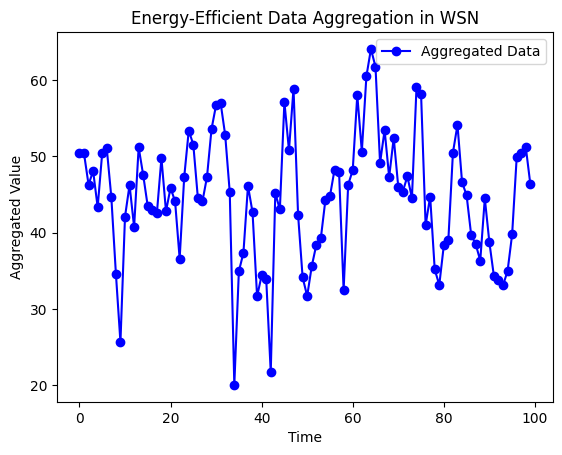

In [7]:
import random
import matplotlib.pyplot as plt
import simpy

# Define parameters
NUM_SENSORS = 10
MAX_DATA = 100
SIMULATION_TIME = 100

# Data aggregator
def data_aggregator(data, weights):
    aggregated_value = sum(data[i] * weights[i] for i in range(NUM_SENSORS))
    return aggregated_value

# Sensor node
def sensor_node(env, node_id, data, results):
    while True:
        sensor_data = random.randint(0, MAX_DATA)
        data[node_id] = sensor_data
        yield env.timeout(random.uniform(1, 5))  # Random data transmission interval

# Aggregated data collector
def aggregated_data_collector(env, data, results):
    while True:
        aggregated_value = data_aggregator(data, weights)
        results.append(aggregated_value)
        print(f"Aggregated value: {aggregated_value} at time {env.now}")
        yield env.timeout(1)  # Data aggregation interval

# Initialize simulation environment
env = simpy.Environment()

# Create data lists for each sensor
sensor_data = [0] * NUM_SENSORS

# Create a results list to store aggregated data
results = []

# Define weights for each sensor (for weighted averaging)
weights = [0.1, 0.2, 0.15, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.05]

# Create sensor nodes
for i in range(NUM_SENSORS):
    env.process(sensor_node(env, i, sensor_data, results))

# Create an aggregated data collector process
env.process(aggregated_data_collector(env, sensor_data, results))

# Run the simulation
env.run(until=SIMULATION_TIME)

# Visualize the results
plt.plot(results, 'bo-', label='Aggregated Data')
plt.xlabel('Time')
plt.ylabel('Aggregated Value')
plt.legend()
plt.title('Energy-Efficient Data Aggregation in WSN')
plt.show()

## Technique used Minimum Spanning Tree

Minimum Spanning Tree (MST) algorithm is often used to reduce the amount of data transmitted within the network while maintaining connectivity and efficiently aggregating data.

Node 6 aggregated value: 0 at time 1.6997703019802932
Node 2 aggregated value: 142 at time 1.700691181356782
Node 7 aggregated value: 254 at time 1.7323610402494363
Node 8 aggregated value: 87 at time 1.766624477502463
Node 1 aggregated value: 70 at time 1.934679364439003
Node 5 aggregated value: 81 at time 2.5447867942765843
Node 9 aggregated value: 144 at time 3.0314210771331744
Node 4 aggregated value: 158 at time 4.630404741785707
Node 0 aggregated value: 146 at time 4.687012038836915
Node 3 aggregated value: 86 at time 4.711223801583003
Node 8 aggregated value: 106 at time 4.793198873077721
Node 6 aggregated value: 0 at time 5.182268323296474
Node 9 aggregated value: 79 at time 5.846712274557666
Node 2 aggregated value: 159 at time 6.037046319867647
Node 7 aggregated value: 321 at time 6.211782189089837
Node 1 aggregated value: 181 at time 6.37934203594463
Node 5 aggregated value: 17 at time 6.929761837119853
Node 0 aggregated value: 74 at time 7.316881020230065
Node 3 aggregated 

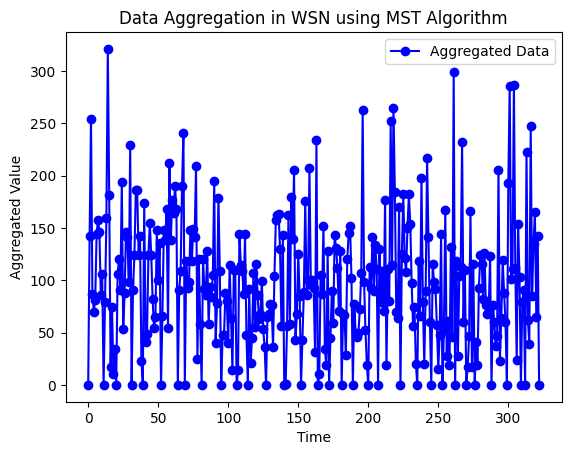

In [10]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx

# Define parameters
NUM_SENSORS = 10
MAX_DATA = 100
SIMULATION_TIME = 100

# Data aggregator
def data_aggregator(data):
    return sum(data)

# Sensor node
def sensor_node(env, node_id, data, results, network):
    while True:
        sensor_data = random.randint(0, MAX_DATA)
        data[node_id] = sensor_data
        yield env.timeout(random.uniform(1, 5))  # Random data transmission interval
        neighbors = network.neighbors(node_id)
        if neighbors:
            neighbor_data = [data[neighbor] for neighbor in neighbors]
            aggregated_value = data_aggregator(neighbor_data)
            data[node_id] = aggregated_value
            results.append(aggregated_value)
            print(f"Node {node_id} aggregated value: {aggregated_value} at time {env.now}")

# Initialize simulation environment
env = simpy.Environment()

# Create data lists for each sensor
sensor_data = [0] * NUM_SENSORS

# Create a results list to store aggregated data
results = []

# Create a random sensor network using NetworkX
sensor_network = nx.random_geometric_graph(NUM_SENSORS, 0.3)

# Create sensor nodes
for i in range(NUM_SENSORS):
    env.process(sensor_node(env, i, sensor_data, results, sensor_network))

# Run the simulation
env.run(until=SIMULATION_TIME)

# Visualize the results
plt.plot(results, 'bo-', label='Aggregated Data')
plt.xlabel('Time')
plt.ylabel('Aggregated Value')
plt.legend()
plt.title('Data Aggregation in WSN using MST Algorithm')
plt.show()

## Technique used LEACH algorithm

LEACH is a popular algorithm used to minimize energy consumption in WSNs by forming clusters and selecting cluster heads for data aggregation.

Cluster Head 32 aggregated value: 55 at time 3.411271653119721
Cluster Head 43 aggregated value: 78 at time 3.9944749951460747
Cluster Head 47 aggregated value: 128 at time 4.055789607455389
Cluster Head 19 aggregated value: 92 at time 4.171602658216729
Cluster Head 15 aggregated value: 168 at time 4.721575335491835
Cluster Head 47 aggregated value: 0 at time 6.742025211135013
Cluster Head 32 aggregated value: 55 at time 6.880342485907375
Cluster Head 15 aggregated value: 0 at time 7.264652752151056
Cluster Head 43 aggregated value: 78 at time 8.22757911321803
Cluster Head 19 aggregated value: 92 at time 8.582896058233217
Cluster Head 32 aggregated value: 55 at time 9.784451683277792
Cluster Head 43 aggregated value: 39 at time 9.932311978812681
Cluster Head 15 aggregated value: 84 at time 10.508553531345534
Cluster Head 47 aggregated value: 128 at time 11.079805699852162
Cluster Head 32 aggregated value: 55 at time 11.921870757899288
Cluster Head 43 aggregated value: 39 at time 12.393

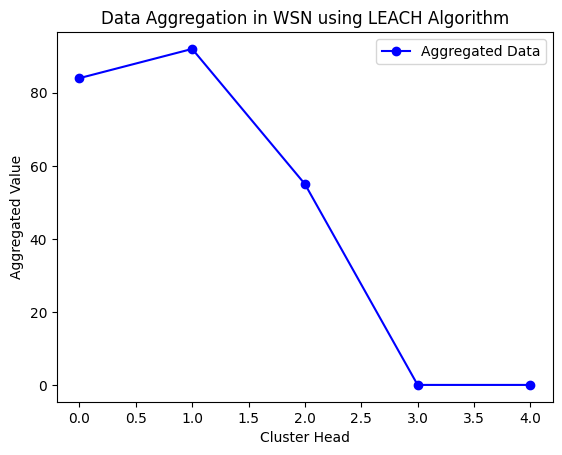

In [14]:
import random
import matplotlib.pyplot as plt
import simpy

# Define parameters
NUM_SENSORS = 50  # Number of sensors
NUM_ROUNDS = 10  # Number of rounds in LEACH
MAX_DATA = 100
SIMULATION_TIME = NUM_ROUNDS * 10

# Initialize simulation environment
env = simpy.Environment()

# Sensor node
class SensorNode:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.cluster_head = None
        self.data = random.randint(0, MAX_DATA)
        self.cluster_size = 0

    def run(self):
        while True:
            if self.cluster_head:
                # Transmit data to the cluster head
                yield self.env.timeout(random.uniform(0, 1))
                self.cluster_head.receive_data(self.node_id, self.data)
            yield self.env.timeout(random.uniform(1, 5))  # Data transmission interval

    def join_cluster(self, cluster_head):
        self.cluster_head = cluster_head

# Cluster head
class ClusterHead:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.data_buffer = []

    def run(self):
        while True:
            yield self.env.timeout(random.uniform(1, 5))  # Data aggregation interval
            # Aggregate data from cluster members and perform tasks
            aggregated_value = sum(data for data in self.data_buffer)  # Sum the data in the buffer
            self.data_buffer = []  # Clear data buffer
            print(f'Cluster Head {self.node_id} aggregated value: {aggregated_value} at time {env.now}')

    def receive_data(self, sender_id, data):
        # Receive data from sensor nodes and store it in the buffer
        self.data_buffer.append(data)

# LEACH network setup
sensor_nodes = [SensorNode(env, i) for i in range(NUM_SENSORS)]
cluster_heads = []

# Randomly select cluster heads
for node in sensor_nodes:
    if random.random() < 0.1:  # Probability of becoming a cluster head (adjust as needed)
        cluster_head = ClusterHead(env, node.node_id)
        cluster_heads.append(cluster_head)
        node.join_cluster(cluster_head)

# Create processes for sensor nodes and cluster heads
for node in sensor_nodes:
    env.process(node.run())
for cluster_head in cluster_heads:
    env.process(cluster_head.run())

# Run the simulation
env.run(until=SIMULATION_TIME)

# Collect and print aggregated data from cluster heads
aggregated_data = [sum(cluster_head.data_buffer) for cluster_head in cluster_heads]

# Visualize the results
plt.plot(aggregated_data, 'bo-', label='Aggregated Data')
plt.xlabel('Cluster Head')
plt.ylabel('Aggregated Value')
plt.legend()
plt.title('Data Aggregation in WSN using LEACH Algorithm')
plt.show()



## Technique used Directed Diffusion algorithm

Directed Diffusion is a gradient-based approach that leverages data-centric routing to collect and aggregate data efficiently.

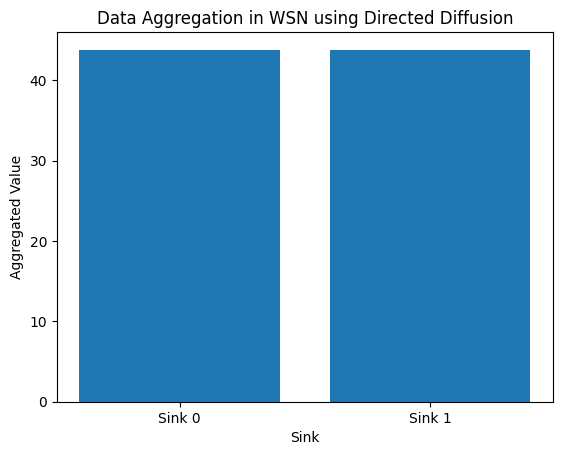

In [9]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx

# Define parameters
NUM_SENSORS = 50  # Number of sensors
MAX_DATA = 100
SIMULATION_TIME = 100

# Initialize simulation environment
env = simpy.Environment()

# Sensor node
class SensorNode:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.data = random.randint(0, MAX_DATA)

    def run(self):
        while True:
            # Send data to sinks (base stations)
            yield self.env.timeout(random.uniform(1, 5))
            data_packet = {'node_id': self.node_id, 'data': self.data}
            for sink in sinks:
                sink.receive_data(data_packet)

# Sink (Base Station)
class Sink:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.data_buffer = []

    def receive_data(self, data_packet):
        self.data_buffer.append(data_packet)

    def aggregate_data(self):
        # Perform data aggregation (e.g., average)
        aggregated_value = sum(packet['data'] for packet in self.data_buffer) / len(self.data_buffer)
        return aggregated_value

# Create sensor nodes
sensor_nodes = [SensorNode(env, i) for i in range(NUM_SENSORS)]

# Create sink nodes (base stations)
NUM_SINKS = 2  # Number of sink nodes
sinks = [Sink(env, i) for i in range(NUM_SINKS)]

# Create a network topology (e.g., random geometric graph)
sensor_network = nx.random_geometric_graph(NUM_SENSORS, 0.3)

# Create processes for sensor nodes
for node in sensor_nodes:
    env.process(node.run())

# Run the simulation
env.run(until=SIMULATION_TIME)

# Aggregate data at sinks
aggregated_data = [sink.aggregate_data() for sink in sinks]

# Visualize the results
plt.bar(range(NUM_SINKS), aggregated_data, tick_label=[f'Sink {i}' for i in range(NUM_SINKS)])
plt.xlabel('Sink')
plt.ylabel('Aggregated Value')
plt.title('Data Aggregation in WSN using Directed Diffusion')
plt.show()